In [1]:
# Correct import statements for the latest Qiskit version
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define the number of qubits and depths for the benchmarking
num_qubits = 2
depths = [5, 10]  # Different lengths for the benchmarking sequence

In [15]:
# Define a noise model with depolarizing errors
noise_model = NoiseModel()

In [16]:
# Single qubit depolarizing error for gates like sx
single_qubit_depol_error = depolarizing_error(0.01, 1)  # 1% error for single-qubit gates
noise_model.add_all_qubit_quantum_error(single_qubit_depol_error, ["sx", "x", "y", "z"])

In [17]:
# Two-qubit depolarizing error for gates like cx
two_qubit_depol_error = depolarizing_error(0.01, 2)  # 1% error for two-qubit gates
noise_model.add_all_qubit_quantum_error(two_qubit_depol_error, ["cx", "cz"])

In [18]:
# Create a simulator with the noise model
simulator = AerSimulator(noise_model=noise_model)

In [19]:
# Create a function to generate randomized benchmarking circuits with measurements
def create_rb_circuits(num_qubits, depth):
    """Generates randomized benchmarking circuits with measurements."""
    rb_circuits = []
    
    # Randomized benchmarking sequence using different depths
    for d in range(1, depth + 1):
        for _ in range(d):  # Loop to add random sequences of gates
            circuit = QuantumCircuit(num_qubits, num_qubits)  # Include classical bits for measurement
            for qubit in range(num_qubits):
                circuit.x(qubit)  # Apply X gate for randomness (can vary for more complexity)
            circuit.barrier()
            # Add measurement to the circuit
            circuit.measure(range(num_qubits), range(num_qubits))
            rb_circuits.append(circuit)
    
    return rb_circuits

In [20]:
# Generate randomized benchmarking circuits for different depths
rb_circuits = []
for depth in depths:
    rb_circuits.extend(create_rb_circuits(num_qubits, depth))

In [21]:
# Transpile the circuits for the simulator
transpiled_circuits = transpile(rb_circuits, simulator)

In [22]:
# Running the circuits on the simulator using the 'run' method
job = simulator.run(transpiled_circuits, shots=1024)

In [23]:
# Collect the results from the simulation
result = job.result()

In [28]:
results = create_rb_circuits(num_qubits, depth)
print(results)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c5a5fd0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x14a9fd810>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15cc75510>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x14aba3650>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15eb49750>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c555810>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15cb98c10>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c5344d0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c59bd10>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c5543d0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15cd65b90>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c574b10>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c574410>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x15c577b90>, <qiskit.circuit.qua

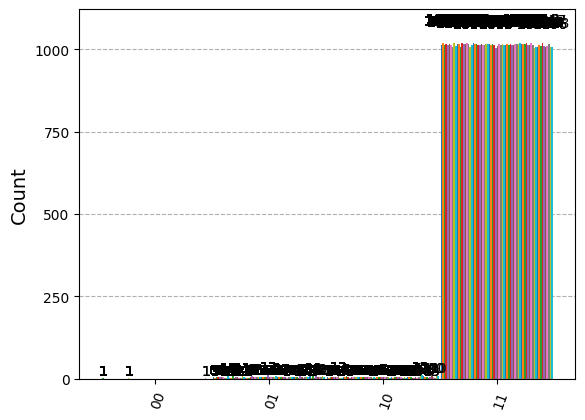

In [29]:
# Plot the results as a histogram
counts = result.get_counts()
plot_histogram(counts)

EXPLANATION:
------

matplotlib.pyplot: This is a standard library for generating plots in Python. It's used here for visualizing the measurement results as a histogram.

QuantumCircuit: The fundamental class from Qiskit used to create quantum circuits. It allows for the addition of quantum gates, measurement operations, and other components that represent a quantum algorithm.

transpile: This function is used to optimize and compile quantum circuits for execution on a specific quantum backend. It ensures that the circuits are tailored for the simulator (or real hardware) being used.

AerSimulator: From Qiskit's Aer library, AerSimulator is the backend simulator used to execute quantum circuits with noise modeling. It's a high-performance simulator used for testing quantum algorithms.

NoiseModel and depolarizing_error: These classes are used to model and apply noise to the quantum simulator. Depolarizing noise is a common model used to simulate real-world imperfections in quantum gates.

plot_histogram: This function is used to visualize the results of quantum measurements in the form of a histogram. It is useful for understanding the outcomes of quantum circuits.

1. NoiseModel: This class defines the noise model that will be applied to the quantum simulator. In the code, we define depolarizing noise for both single-qubit and two-qubit gates.

Depolarizing Error: This is a noise model where each gate has a small probability of acting as a completely random operation instead of the intended gate. In the code:
A 1% depolarizing error is applied to all single-qubit gates (sx, x, y, z).
A 1% depolarizing error is also applied to two-qubit gates (cx, cz).
This models how quantum circuits behave in real-world scenarios where gates are not perfect, and errors accumulate.


2. Randomized Benchmarking Circuit Creation:
QuantumCircuit: This class is used to construct quantum circuits for the RB protocol. A circuit is created for each depth (level of repetitions for randomized benchmarking).

Random Gate Sequences: For each circuit, the X gate (which flips a qubit) is applied. In a true randomized benchmarking experiment, a sequence of random gates would be applied instead of just X gates, but in this simple version, we use X gates as placeholders.

Measurement: After the gates are applied, we perform a measurement on each qubit (circuit.measure(range(num_qubits), range(num_qubits))). This measures the state of each qubit and stores the result in classical bits.

Barrier: The barrier() function is used to separate sections of the circuit logically. It does not affect the execution but ensures that gates are grouped logically.

This function creates multiple randomized benchmarking circuits of varying depths (i.e., different numbers of randomized gates).

3. Simulating the Circuit:
Creating Circuits: The code generates multiple circuits for different depths (5 and 10 in the depths list).

Transpiling: The circuits are optimized for the simulator using the transpile() function. This step ensures that the circuits are in an executable form suitable for the chosen backend.

Simulator Execution: The circuits are then executed on the noise-added simulator (AerSimulator with a noise model). We run each circuit 512 times (shots=512) to collect enough data to assess the gate fidelity.

4. Visualizing the Results:
Result Collection: The result from the simulation (job.result()) is obtained and then processed using get_counts(), which returns the measurement outcomes (i.e., the bitstrings that correspond to the measurements of qubits in the circuit).

Plotting: The plot_histogram(counts) function is used to generate a histogram that shows the frequency of each possible outcome from the randomized benchmarking experiment.

plt.show(): This ensures that the plot is explicitly rendered in the Google Colab environment.


Concepts Used:
Randomized Benchmarking: This is a technique used to measure the fidelity of quantum gates by applying random sequences of quantum gates and then measuring the error rate. It is a powerful method for characterizing quantum hardware, especially when noise is present.

Noise Modeling: The code simulates real-world quantum computers by adding noise to the quantum gates. The depolarizing error model is commonly used to represent random errors that can occur during quantum computations.

Quantum Circuit Creation and Measurement: The quantum circuits are created using QuantumCircuit from Qiskit. After applying the gates, measurements are taken to observe the state of the qubits, which is necessary for analyzing the fidelity of quantum operations.

Simulation: Using AerSimulator, we simulate the quantum circuits with added noise. This is helpful when working with quantum systems that are too expensive or unavailable for real hardware testing.


Key Questions:
State: The state of the quantum system is encoded by applying quantum gates (like X, CX) to qubits. Random sequences of gates are applied to simulate errors and measure the gate fidelity.

Quantum Circuit Construction: The quantum circuit is constructed by applying gates (random or predefined) to qubits, followed by measurement operations. This represents the "problem space" in a randomized benchmarking experiment.

Quantum Algorithms for Optimal Solution: In RB, the goal is to characterize the noise in quantum gates. Algorithms used in RB focus on minimizing the error rates and determining how reliable quantum gates are over multiple executions.

Measuring Qubits: The qubits are measured after applying the noise model, and their final states are read out. This provides a way to assess how well the gates perform under noise.

Advantages and Disadvantages:

Advantages: RB is efficient for benchmarking quantum devices, even with noisy gates. It provides a way to assess gate fidelity without requiring a complete understanding of the noise model.
Disadvantages: It doesn't directly correct errors; it only quantifies them. Moreover, the method can be computationally expensive for large circuits.

